## 1. 예측 모델에 대한 개발 설명 

모델을 개발한 과정/방법에 대한 설명을 아래와 유사한 형태로 기술해 주세요.

### A. 분석 배경 및 과정

x 모형은 y를 기반으로 한다.

In [1]:
Image.open("모델 개발 설명서/수식.png")

NameError: name 'Image' is not defined

여기서 Y는 ..., a는 ..., x는 ... 와 같은 기대값을 갖는다.  
X 모델에서 추출한 Z의 값에 대한 인사이트로 추가적인 P를 했다.  
U 변수를 모델에 편입시키는 방법으로 새로운 Q를 계산 할 수 있다.  
E와 W는 모델 개발의 유의미한 영향을 미치지 않았다.

### A. 채택된 변수에 대한 설명 

In [17]:
import pandas as pd

cus_info=pd.read_csv('data/cus_info.csv')

In [19]:
cus_info.head()

,act_id,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd
0,64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097...,1,4,99,1,2,3,3,6,16
1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,1,6,4,4,2,5,2,6,1
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2,7,4,3,2,5,5,6,9
3,6d497facfa1ea5901b827335553331f8555fec02a8184f...,2,6,4,4,8,5,3,6,16
4,b727c78d2cfc246c97b677f29a034399a0c7e7873fff44...,1,5,2,2,2,5,5,5,16


In [33]:
cus_info.columns

Index(['act_id', 'sex_dit_cd', 'cus_age_stn_cd', 'ivs_icn_cd',
       'cus_aet_stn_cd', 'mrz_pdt_tp_sgm_cd', 'tot_ivs_te_sgm_cd',
       'mrz_btp_dit_cd'],
      dtype='object')

### A-1. 기존 변수 채택

#### A-1-1. cus_info.csv

act_id는 train, test 간 연결해주기 위한 primary key로 사용되어 채택하였다.

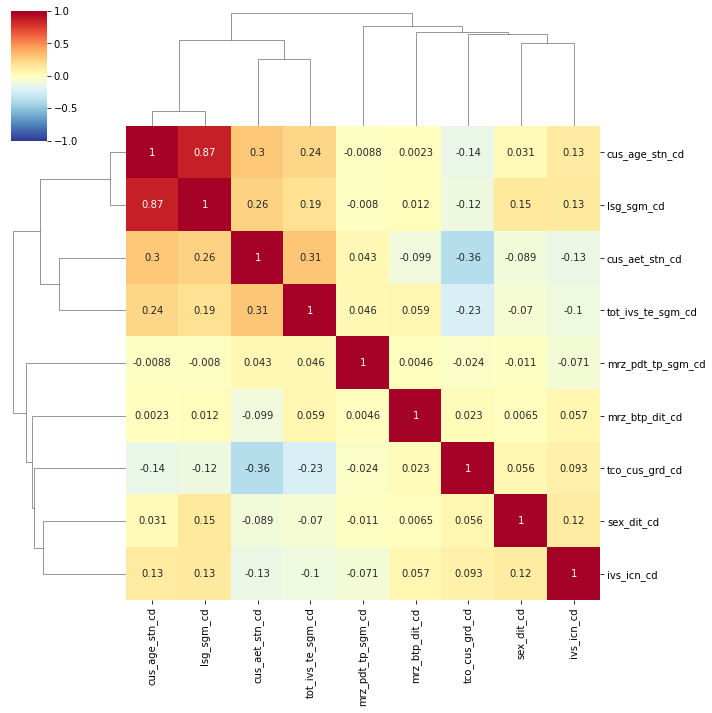

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = cus_info.corr()

sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

cus_age_stn_cd와 lsg_sgm_cd의 양의 상관관계가 매우 높게 나와서 lsg_sgm_cd feature을 삭제하고 cus_age_stn_cd을 채택하였다.

tco_cus_grd_cd와 cus_aet_stn_cd의 음의 상관관계가가 높게 나와 tco_cus_grd_cd feature을 삭제했다.

In [22]:
cus_info.drop(['lsg_sgm_cd'],axis=1,inplace=True)
cus_info.drop(['tco_cus_grd_cd'],axis=1,inplace=True)

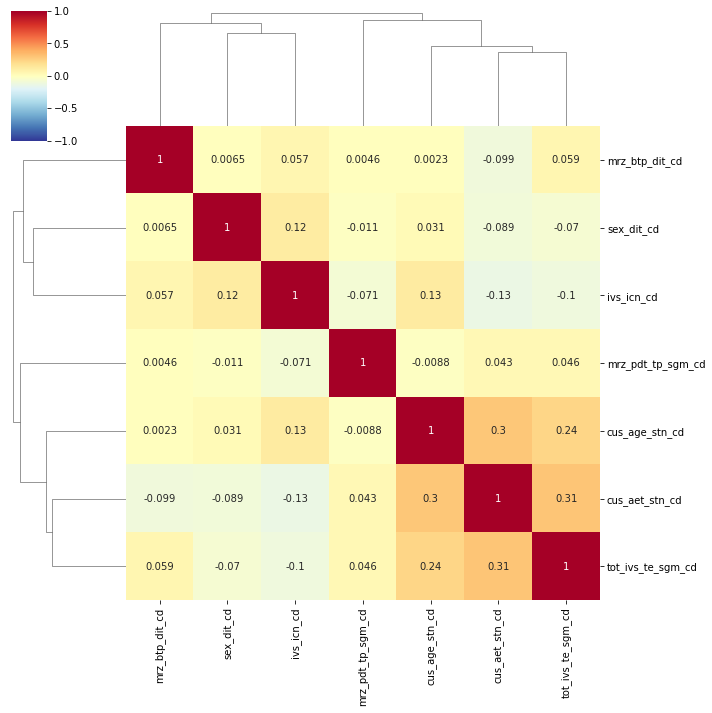

In [23]:
df = cus_info.corr()

sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

In [24]:
cus_info.groupby('sex_dit_cd')['ivs_icn_cd'].value_counts().to_frame()

ivs_icn_cd
sex_dit_cd ivs_icn_cd            
1          99                1915
           4                 1263
           3                 1056
           2                  833
           5                  717
           1                  104
           0                   94
           9                    3
2          99                1772
           2                  634
           3                  613
           4                  595
           5                  218
           1                  106
           0                   77

sex_dit_cd는 고객 별 성별 데이터로, ivs_icn_cd와 연관성을 위의 clustermap에서 파악할 수 있었다. 

그래서 성별에 투자성향이 미정의:99 를 제외한 나머지 성향에서 여성과 남성이 차이가 있음을 알수 있어 두 변수를 채택하였다.

In [27]:
cus_info.groupby('tot_ivs_te_sgm_cd')['cus_aet_stn_cd'].value_counts().to_frame()

cus_aet_stn_cd
tot_ivs_te_sgm_cd cus_aet_stn_cd                
1                 1                          721
                  2                          147
                  3                           41
                  4                           36
                  5                           16
                  6                            1
2                 1                         1276
                  2                          995
                  3                          391
                  4                          362
                  5                          224
                  6                           67
3                 1                         1312
                  2                         1268
                  4                          562
                  3                          519
                  5                          457
                  6                          153
4                 2                          243
                  1                          206
                  4                          173
                  5                          161
                  3                          139
                  6                           70
5                 5                           81
                  2                           59
                  4                           58
                  1                           45
                  3                           40
                  6                           29
6                 5                           45
                  4                           31
                  2                           28
                  3                           17
                  6                           15
                  1                           12

tot_ivs_te_sgm_cd는 총 투자기간을 나타내는 변수로, cus_aet_stn_cd인 고객자산구간과 연관성을 위의 clustermap에서 파악할 수 있었다. 

그래서 총 투자기간에 따른 고객 자산 구간을 확인해 본 결과, 총 투자기간인 5,6(5년 이상)에서는 1억원 이상의 총 자산금액이 있다는 것을 파악 하였고 그 미만 투자기간에서는 1천만원 이상 3천만원 미만의 총 자산금액이 있음을 파악하여 두 변수를 채택하였다.

In [34]:
cus_info['mrz_pdt_tp_sgm_cd'].to_frame().value_counts()

mrz_pdt_tp_sgm_cd
2                    9659
3                     261
1                      34
15                     10
10                      9
8                       8
5                       7
9                       5
11                      3
6                       3
12                      1
dtype: int64

mrz_pdt_tp_sgm_cd는 주거래 상품군으로, 2인 국내주식이 가장 많았어서 국내와 그 외 주식별로 차이가 있을 것이라 생각되어 채택하였다.

mrz_btp_dit_cd는 주거래 업종구분으로, 개인별 act_id에 따른 주거래 업종 구분을 파악하기 위해 채택하였다.

#### A-1-2. iem_info_20210902.csv

In [35]:
iem_info=pd.read_csv('data/iem_info_20210902.csv')

In [36]:
iem_info.head()

,iem_cd,iem_krl_nm,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd
0,A000020,동화약품,8,2,99
1,A000080,하이트진로,14,2,1
2,A000180,성창기업지주,5,3,99
3,A000227,유유제약2우B,8,99,99
4,A000325,노루홀딩스우,2,99,99


### A-2. 파생 변수 생성


'hist_d', 
'yield', # 구매일자의 주가 / 판매일자의 주가 hist에 파생

 'buy_sell_quant', 'best_btp',  #cus info에 파생
 'id_iem_hold',
 'iem_krl_nm',  mkt_pr_tal_scl_tp_cd','stk_dit_cd', #iem 채택
 'btp_cfc_cd_x'#사람별 가장 많이 산 종목 iem 파생
 btp_cfc_cd_y',,삭제시키기
 ' 
       'total',# 총 수익 -> hist
     'bnc_qty'tot_aet_amt', 'stk_par_pr',,#hist에 채택

   'stk_p' #주식 주당 가격

act_id는 B 파생 변수는 이러한 로직으로 생성되었다.

### B. 분석의 범주

분석 대상은 X와 같은 이유로 Y 타겟으로 실시했다.  
X는 90일 아래로 제한하고 E는 30일 아래로 제한했다.  
A을 지키기 위해서 U를 0~9개 사이로 지정했다.

### C. 모델링 진행 및 중요한 가정들

X 때문에 왜곡이 심해서 Y를 계산해야만 했다.  
Z 모형을 Q, E, R과 같은 가정들이 있어, W를 통해 가정 체크를 진행했다.  
Z 분석 결과의 X 값은 D 현상을 보일 우려가 있어 절대값으로 치환하여 계산했다.  
모델은 Q 모델을 최종적으로 선정하였으며, W와 같은 성능을 보였다.

### D. 모델링에 대한 추가적인 특이사항

해당 모델링은 X와 같은 이유로 Y개의 결과물로 가진다.  
우선순위를 Q와 같은 이유로 매겨지지만 Z 모형으로 인해 Q 효과를 볼 수 있다.

## 2. 외부 데이터에 대한 설명

아래 정보를 포함하여 자유롭게 기술해 주세요

- 데이터 종류/분류  
- 데이터 원천/웹사이트  
- 수집/적재 방법  
- 전처리 방법  
- 활용 방안  
- 활용한 이유  
- 지속성에 대한 설명  

** 외부데이터는 2021년 데이터를 사용하지 않도록 유의합니다: Data Leakage에 해당